# Problem 4

In [1]:
import numpy as np
import numpy.polynomial as pl
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
from scipy.interpolate import *
import seaborn as sns
import scipy

Fit_poly receives as an argument the integer number N. N is the number of points of the sinusoidal function y(x)=sin(2πx). White gaussian noise is added to each observation, to form y_noisy vector. Then, the polyfit function of numpy is called. Polyfit fits a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y) and it returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0. Also this function calculates the RMSE of each model

In [2]:
def fit_poly(N):
    #generate N points of white gaussian noise
    noise = np.random.normal(0,1,N)
    #generate N points of sine
    x=np.linspace(0, 1, N)
    y = np.sin(2*np.pi*x)
    #calculate N noisy sine observations
    y_noise = np.add(y,noise)
    
    #plot the noisy sine
    plt.plot(x, y_noise, color = 'blue')
    plt.title('Sine with white gaussian noise with '+str(N)+' samples')
    plt.xlabel('Time')
    plt.ylabel('y(x) = sin(2πx) + η')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.show()
    
    #fit the noisy sine to polynomials of different degrees(2,3,4,5 and 9) using polifit
    #p2,...,p9 contains the coefficients of the different models
    p2 = np.polyfit(x, y_noise, 2)
    p3 = np.polyfit(x, y_noise, 3)
    p4 = np.polyfit(x, y_noise, 4)
    p5 = np.polyfit(x, y_noise, 5)
    p9 = np.polyfit(x, y_noise, 9)
    
    #plot the N onservations, the true curve and the best fit polynomial of 2,3,4,5 and 9 degree
    #polyval plots the values of the polynomial with coefficients p2, p3, p4, p5, p9 and input x
    plt.scatter(x, y_noise, color = 'blue', alpha = 0.5, label = 'Noisy observations')
    plt.plot(x, y, color = "darkorchid", label = 'True curve')
    plt.plot(x, np.polyval(p2,x),"m:", label ='Second degree pol')
    plt.legend()
    plt.show()
    
    plt.scatter(x, y_noise, color = 'blue', alpha = 0.5, label = 'noisy observations')
    plt.plot(x, y, color = "darkorchid", label = 'True curve')
    plt.plot(x, np.polyval(p3,x),"m:", label ='Third degree pol')
    plt.legend()
    plt.show()
    
    plt.scatter(x, y_noise, color = 'blue', alpha = 0.5, label = 'noisy observations')
    plt.plot(x, y, color = "darkorchid", label = 'True curve')
    plt.plot(x, np.polyval(p4,x),"m:", label ='Forth degree pol')
    plt.legend()
    plt.show()
    
    plt.scatter(x, y_noise, color = 'blue', alpha = 0.5, label = 'noisy observations')
    plt.plot(x, y, color = "darkorchid", label = 'True curve')
    plt.plot(x, np.polyval(p5,x),"m:", label ='Fifth degree pol')
    plt.legend()
    plt.show()
    
    plt.scatter(x, y_noise, color = 'blue', alpha = 0.5, label = 'noisy observations')
    plt.plot(x, y, color = "darkorchid", label = 'True curve')
    plt.plot(x, np.polyval(p9,x),"m:", label ='Ninth degree pol')
    plt.legend()
    plt.show()
    
    #calclate the RMSE of each model, by comparing the true curve (y) points with the best fit polynomial models
    rmse_2 = np.sqrt(mean_squared_error(y,np.polyval(p2,x)))
    rmse_3 = np.sqrt(mean_squared_error(y,np.polyval(p3,x)))
    rmse_4 = np.sqrt(mean_squared_error(y,np.polyval(p4,x)))
    rmse_5 = np.sqrt(mean_squared_error(y,np.polyval(p5,x)))
    rmse_9 = np.sqrt(mean_squared_error(y,np.polyval(p9,x)))
    print("The root mean square error between the true sine curve and the predicted curve:")
    print("-The root mean square error for the polynomial of second degree is: "+str(rmse_2))
    print("-The root mean square error for the polynomial of third degree is: "+str(rmse_3))
    print("-The root mean square error for the polynomial of fourth degree is: "+str(rmse_4))
    print("-The root mean square error for the polynomial of fifth degree is: "+str(rmse_5))
    print("-The root mean square error for the polynomial of ninth degree is: "+str(rmse_9)+"\n")
    
    #calclate the RMSE of each model, by comparing the noisy curve (y_noise) points with the best fit polynomial models
    rmse_2 = np.sqrt(mean_squared_error(y_noise,np.polyval(p2,x)))
    rmse_3 = np.sqrt(mean_squared_error(y_noise,np.polyval(p3,x)))
    rmse_4 = np.sqrt(mean_squared_error(y_noise,np.polyval(p4,x)))
    rmse_5 = np.sqrt(mean_squared_error(y_noise,np.polyval(p5,x)))
    rmse_9 = np.sqrt(mean_squared_error(y_noise,np.polyval(p9,x)))
    print("The root mean square error between the noisy sine curve and the predicted curve:")
    print("-The root mean square error for the polynomial of second degree is: "+str(rmse_2))
    print("-The root mean square error for the polynomial of third degree is: "+str(rmse_3))
    print("-The root mean square error for the polynomial of fourth degree is: "+str(rmse_4))
    print("-The root mean square error for the polynomial of fifth degree is: "+str(rmse_5))
    print("-The root mean square error for the polynomial of ninth degree is: "+str(rmse_9)+"\n")
    
    
    print("The coefficients for the polynomial of second degree are: \n"+str(p2))
    print("\n The coefficients for the polynomial of third degree are: \n"+str(p3))
    print("\n The coefficients for the polynomial of fourth degree are: \n"+str(p4))
    print("\n The coefficients for the polynomial of fifth degree are: \n"+str(p5))
    print("\n The coefficients for the polynomial of ninth degree are: \n"+str(p9))

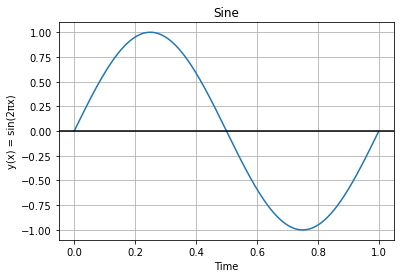

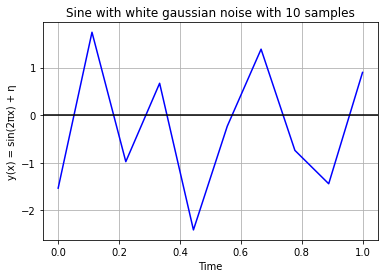

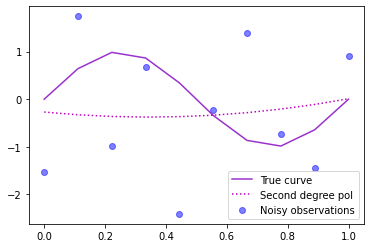

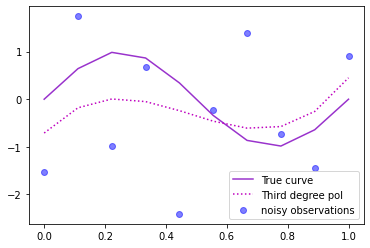

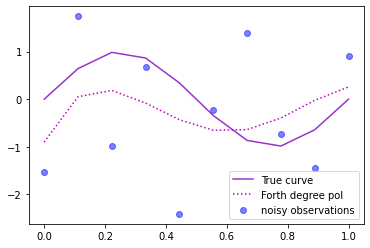

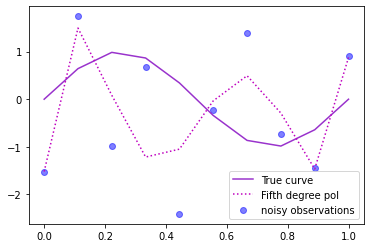

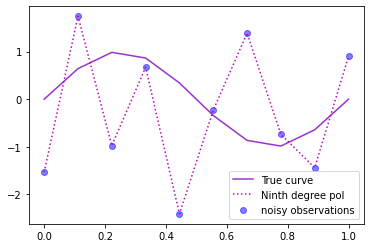

The root mean square error between the true sine curve and the predicted curve:
-The root mean square error for the polynomial of second degree is: 0.7811230822850408
-The root mean square error for the polynomial of third degree is: 0.6262536116259011
-The root mean square error for the polynomial of fourth degree is: 0.6513619369601522
-The root mean square error for the polynomial of fifth degree is: 1.183122162009748
-The root mean square error for the polynomial of ninth degree is: 1.4707030811819475

The root mean square error between the noisy sine curve and the predicted curve:
-The root mean square error for the polynomial of second degree is: 1.311091464019922
-The root mean square error for the polynomial of third degree is: 1.2745079858427129
-The root mean square error for the polynomial of fourth degree is: 1.2618604594529645
-The root mean square error for the polynomial of fifth degree is: 0.8739135422894893
-The root mean square error for the polynomial of ninth degree

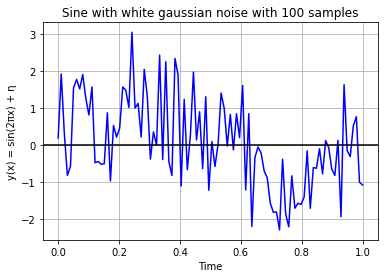

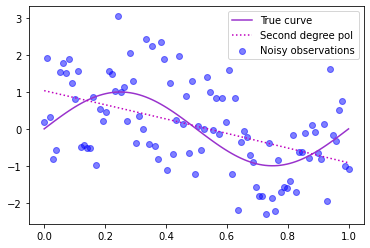

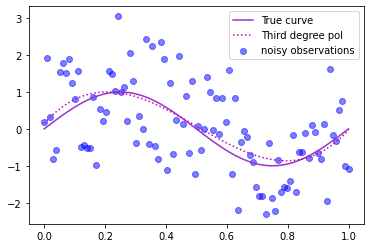

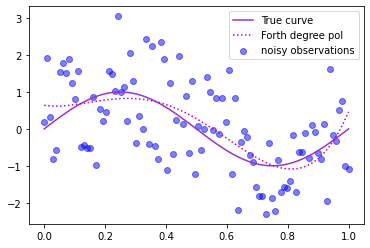

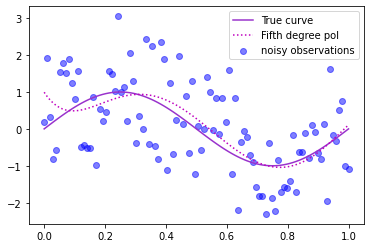

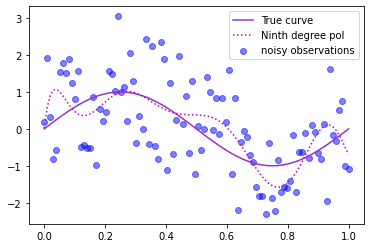

The root mean square error between the true sine curve and the predicted curve:
-The root mean square error for the polynomial of second degree is: 0.4570439914674464
-The root mean square error for the polynomial of third degree is: 0.13552461577420302
-The root mean square error for the polynomial of fourth degree is: 0.2263003180504809
-The root mean square error for the polynomial of fifth degree is: 0.22243539311798338
-The root mean square error for the polynomial of ninth degree is: 0.38849477469920163

The root mean square error between the noisy sine curve and the predicted curve:
-The root mean square error for the polynomial of second degree is: 1.0600749097619233
-The root mean square error for the polynomial of third degree is: 0.9983129383057772
-The root mean square error for the polynomial of fourth degree is: 0.9817249158087571
-The root mean square error for the polynomial of fifth degree is: 0.9739142308579415
-The root mean square error for the polynomial of ninth d

In [3]:
#select 1,000 points from 0 to 1 to draw one period of the sinusoidal function y(x)=sin(2πx)
x = np.arange(0, 1, 0.001)
y = np.sin(2*np.pi*x)

plt.plot(x, y)
plt.title('Sine')
plt.xlabel('Time')
plt.ylabel('y(x) = sin(2πx)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

#call fit_poly to create N (10 and 1,000) noisy observations of the sinusoidal function and fit different polynomials to them
fit_poly(10)
fit_poly(100)

# Problem 3.2 a and b

In [3]:
import scipy

def calculate_mean_variance (N):
    #generate N values for X that follows N(0,4)
    x=np.random.normal(7,16,N)
    
    #calculate the mean of the prior distribution
    m_prior_est = (1/N)*sum(x)

    #calculate the mean of the posterior distribution
    m_post_est = (N*4*m_prior_est+16*0)/(N*4+16)
    
    #calculate the variance of the posterior distribution
    v_post_est = (16*4)/(N*4+16)
    
    #print mean and variance
    print("For N = "+str(N))
    print("-The average value of the distribution is: "+str(m_prior_est))
    print("-The estimate for the mean is :"+ str(m_post_est))
    print("-The estimate for the variance is :"+ str(v_post_est))
    print("\n")
    
    x_values = np.arange(-15, 15, 0.1)
    y_values = scipy.stats.norm(0, 4)
    plt.plot(x_values, y_values.pdf(x_values), label = 'Prior ', color = 'blue')
    plt.title('N= {}'.format(N))
    plt.legend()
    
    y_values = scipy.stats.norm(m_post_est, v_post_est)
    plt.plot(x_values, y_values.pdf(x_values), label = 'Posterior ', color = 'purple')
    plt.title('N= {}'.format(N))
    plt.legend()
    plt.show()
    
    x_values = np.arange(-60, 60, 0.1)
    y_values = scipy.stats.norm(7, 16)
    plt.plot(x_values, y_values.pdf(x_values), label = 'Generating ', color = 'green')
    plt.title('N= {}'.format(N))
    plt.legend()
    plt.show()
    
    
    #sns.distplot(x, hist=False).set(title='The Gaussian that generates '+str(N)+' points')
    #x_new=np.random.normal(m_post_est,v_post_est,N)
    #sns.distplot(x_new, hist=False).set(title='The estimated posterior distribution for '+str(N)+' points')
    #plt.show()
    #return x_new

For N = 1
-The average value of the distribution is: -18.853808741170873
-The estimate for the mean is :-3.7707617482341744
-The estimate for the variance is :3.2




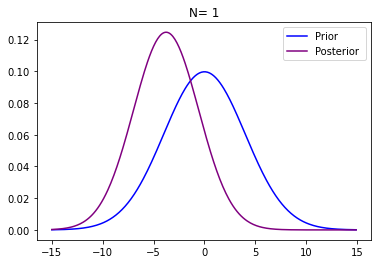

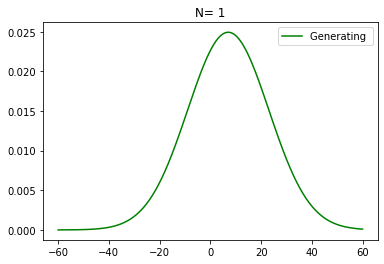

For N = 5
-The average value of the distribution is: 1.8513870014959992
-The estimate for the mean is :1.028548334164444
-The estimate for the variance is :1.7777777777777777




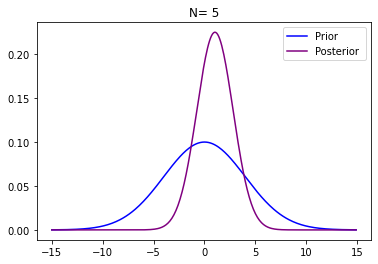

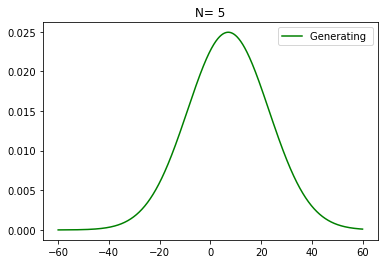

For N = 10
-The average value of the distribution is: 12.069382622519662
-The estimate for the mean is :8.620987587514044
-The estimate for the variance is :1.1428571428571428




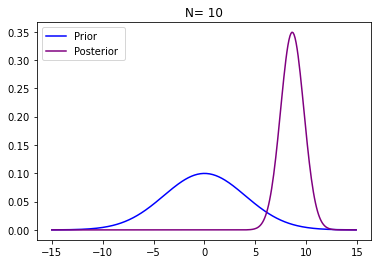

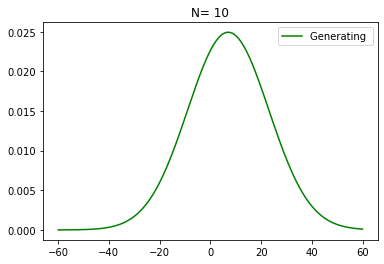

For N = 20
-The average value of the distribution is: 11.026635727019078
-The estimate for the mean is :9.188863105849231
-The estimate for the variance is :0.6666666666666666




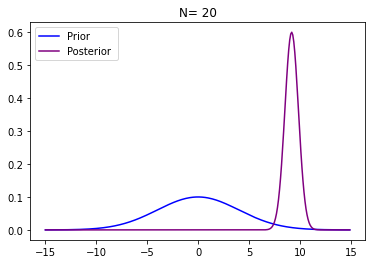

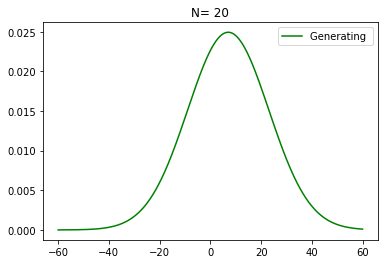

For N = 50
-The average value of the distribution is: 10.221453331672253
-The estimate for the mean is :9.464308640437272
-The estimate for the variance is :0.2962962962962963




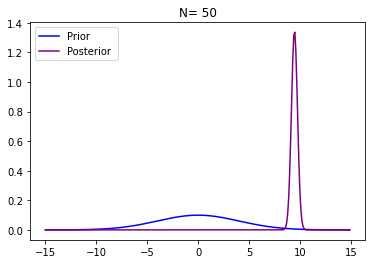

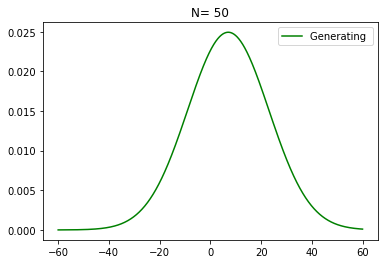

For N = 100
-The average value of the distribution is: 6.254617070947541
-The estimate for the mean is :6.014054875911096
-The estimate for the variance is :0.15384615384615385




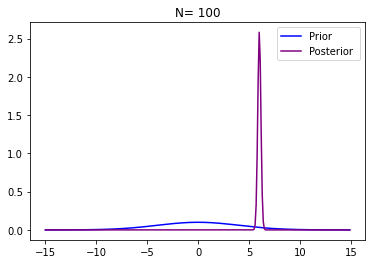

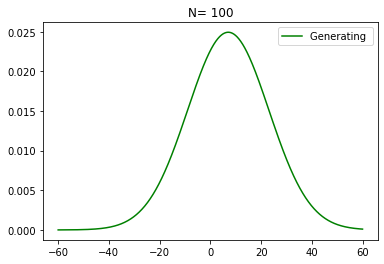

For N = 1000
-The average value of the distribution is: 7.161463094045956
-The estimate for the mean is :7.13293136857167
-The estimate for the variance is :0.01593625498007968




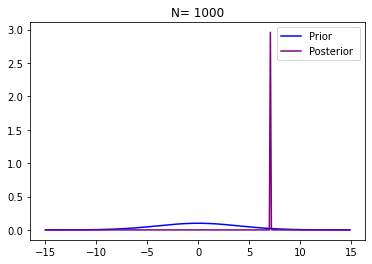

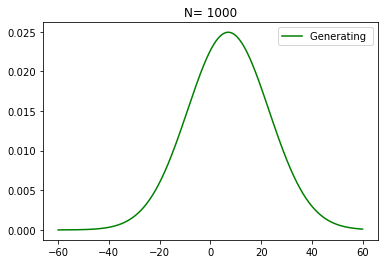

In [7]:
calculate_mean_variance(1)
calculate_mean_variance(5)
calculate_mean_variance(10)
calculate_mean_variance(20)
calculate_mean_variance(50)
calculate_mean_variance(100)
calculate_mean_variance(1000)

# Problem 5

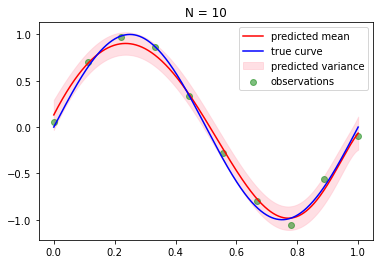

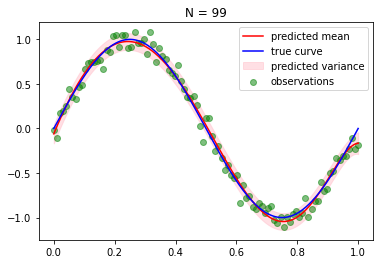

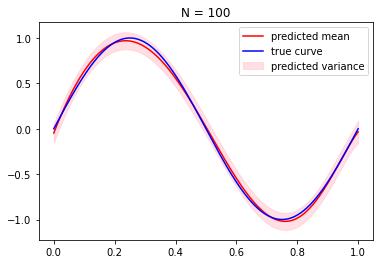

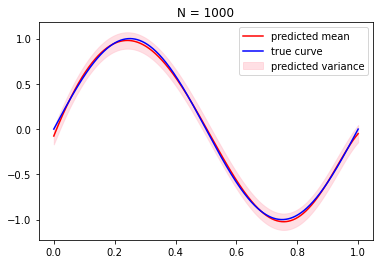

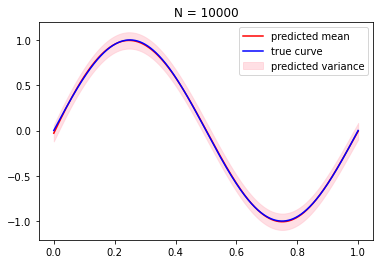

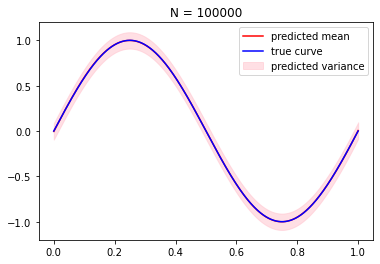

In [8]:
def create_phi(x, M):
    #generate the phi matrix that contains N rows and M+1 coloumns
    #for every row phi[i][0] = 1 
    #for every coloumn j = 1-M+1 phi[i][j] = x[i]**j
    Phi = np.zeros((len(x), M+1))
    for i in range(len(x)):
        for j in range(M+1):
            Phi[i][j] = x[i]**j
    return Phi

def fit(Phi, M, t, alpha, beta):
    #calculate the S and mean_N according to the types presented on slides
    inv_S = alpha*np.eye(M+1)+beta*np.dot(Phi.T,Phi)
    S = np.linalg.inv(inv_S)
    mean_N = beta*np.dot(np.dot(S,Phi.T),t)
    return S, mean_N
    
def predict (M, x, alpha, beta, mean_N, S):
    #calculate the covariance matrix and the mean of the predictive distribution
    phi = create_phi(x,M)
    mean = np.dot(phi, mean_N)
    cov = (1/beta)+np.dot(np.dot(phi,S),phi.T)
    return mean, cov

def pred_mod(N):
    #N observations
    beta = 11.1 
    alpha = 0.005
    M = 9 #ninth degree polynomial

    #generate data on training and test set
    x_train = np.linspace(0, 1, N)
    x_test = np.linspace(0,1,1000)

    #generate sine data using the training set 
    y = np.sin(2*np.pi*x_train)

    #generate noise with o mean and 1\beta variance
    noise = np.random.normal(0,beta**-1,N)

    #create the noisy observations
    y_noise = np.add(y,noise)

    #generate phi for training data
    phi_train = create_phi(x_train,M)

    #fit the model
    S, mean_N = fit(phi_train, M, y_noise, alpha, beta)

    #generate the predictive model
    mean, cov = predict(M, x_test, alpha, beta, mean_N, S)

    #the variance is the elements of the diagonal of the covariance matrix 
    var = np.diag(cov)

    #set up and down limits for the variance
    up = mean-var
    down = mean+var

    #print(up,down)
    #plot the predicted mean, the predicted variance, the true curve and the observations
    plt.fill_between(x_test, up, down, color = 'pink', alpha = 0.5, label="predicted variance")
    plt.plot(x_test, mean, color ='red', label = 'predicted mean')
    plt.plot(x_test, np.sin(2*np.pi*x_test) , color = 'blue', label = 'true curve')
    plt.title('N = '+str(N))
    if N<100:
        plt.scatter(x_train,y_noise, marker =  'o', alpha = 0.5, edgecolor = 'g', facecolor ='g', label="observations")
    plt.legend()
    plt.show()
    
pred_mod(10)
pred_mod(99)
pred_mod(100)
pred_mod(1000)
pred_mod(10000)
pred_mod(100000)